In [1]:
import sys
sys.path.insert(0,os.path.expanduser('~/git/torchseg'))
print(sys.path)

import os
os.chdir(os.path.expanduser('~/git/torchseg'))
from utils.augmentor import get_default_augmentor_config, Augmentations
from utils.disc_tools import show_images

['/home/yzbx/git/torchseg', '', '/home/yzbx/git/torchseg/notebooks', '/home/yzbx/git/gnu/models/research', '/home/yzbx/git/gnu/models/research/slim', '/home/yzbx/bin/miniconda3/envs/new/lib/python36.zip', '/home/yzbx/bin/miniconda3/envs/new/lib/python3.6', '/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/lib-dynload', '/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/cityscapesscripts-1.0.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg', '/home/yzbx/bin/miniconda3/envs/new/lib/python3.6/site-packages/IPython/extensions', '/home/yzbx/.ipython']


(454, 486, 3) (454, 486)


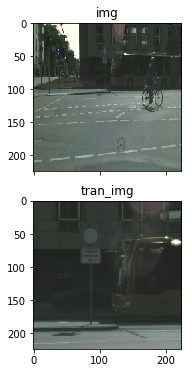

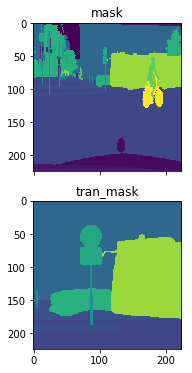

In [24]:
import matplotlib.pyplot as plt
def show_images(images,titles=None,vmin=None,vmax=None):
    fig, axes = plt.subplots(2, (len(images)+1)//2, figsize=(7, 6), sharex=True, sharey=True)
    ax = axes.ravel()

    for i in range(len(images)):
        ax[i].imshow(images[i],vmin=vmin,vmax=vmax)
        if titles is None:
            ax[i].set_title("image %d"%i)
        else:
            ax[i].set_title(titles[i])

    plt.show()
    

config = get_default_augmentor_config()
config.aug.keep_crop_ratio=False
config.aug.use_rotate=False
config.aug.min_crop_size=480
config.aug.max_crop_size=[400,500]
config.aug.use_debug=True
config.aug.horizontal_flip=False
aug = Augmentations(config)
img = cv2.imread('test/image.png', cv2.IMREAD_COLOR)
mask = cv2.imread('test/mask.png', cv2.IMREAD_GRAYSCALE)
#    img=np.random.rand(60,80)
#    mask=np.random.rand(60,80)

assert img is not None
assert mask is not None

tran_img, tran_mask = aug.transform(img, mask)
assert tran_img is not None
assert tran_mask is not None
print(tran_img.shape,tran_mask.shape)

imgs = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR) for img in [img, tran_img]]
masks = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_NEAREST) for img in [mask, tran_mask]]
show_images(imgs, ['img', 'tran_img'])
show_images(masks, ['mask','tran_mask'], vmin=0,vmax=33)

In [5]:
print(np.unique(tran_mask))

[ 7  8 11 25 28 33]


In [16]:
mask.shape
print(mask[700,100])
print(mask[1023,0])
print(mask[1023,2040])
print(tran_mask[400,0])

7
3
3
7


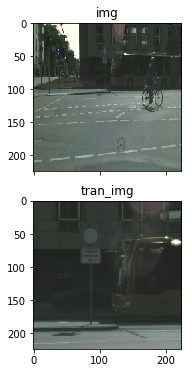

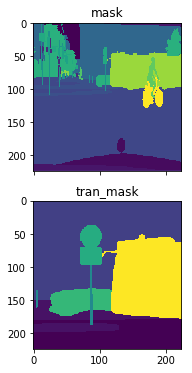

In [26]:
imgs = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR) for img in [img, tran_img]]
masks = [cv2.resize(img, (224, 224), interpolation=cv2.INTER_NEAREST) for img in [mask, tran_mask]]
show_images(imgs, ['img', 'tran_img'])
show_images(masks, ['mask','tran_mask'])